# Data description
**Data from [Zalando GitHub page](https://github.com/zalandoresearch/fashion-mnist)**


## Intro
**Fashion-MNIST** is a dataset of Zalando's article images, intended to serve as a direct replacement of the original [MNIST](http://yann.lecun.com/exdb/mnist/) dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

**Fashion-MNIST** consists of:
 - training set of 60,000 examples
 - test set of 10,000 examples
 
Each example is a 28x28 grayscale image associated with a label from 10 classes:

| Label  | Description |
| ------ | ----------- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### Load training and test datasets
`download_data` downloads data from a given `url`, if no file with the same name has been downloaded so far,  
`read_data` creates labels and datasets from the corresponding .gz files.

With these functions we download data from GitHub and create training/test datasets/label.

In [2]:
import os
import gzip
import struct
import numpy as np
import urllib.request

def download_data(url, force_download=True): 
    fname = url.split("/")[-1]
    if force_download or not os.path.exists(fname):
        urllib.request.urlretrieve(url, fname)
    return fname

def read_data(label, image):
    base_url = 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/'
    with gzip.open(download_data(base_url+label, os.path.join('data',label))) as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        label = np.fromstring(flbl.read(), dtype=np.int8)
    with gzip.open(download_data(base_url+image, os.path.join('data',image)), 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        image = np.fromstring(fimg.read(), dtype=np.uint8).reshape(len(label), rows, cols)
    return (label, image)

(train_lbl, train_img) = read_data('train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz')
(val_lbl, val_img) = read_data('t10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz')

Now that the data are loaded we want to know the shapes of train and test datasets: 

In [3]:
print("Train labels and dataset shapes: ", train_lbl.shape, ",", train_img.shape)
print("Test labels and dataset shapes:  ", val_lbl.shape, ",", val_img.shape)

Train labels and dataset shapes:  (60000,) , (60000, 28, 28)
Test labels and dataset shapes:   (10000,) , (10000, 28, 28)


### Display example training data

Let us take a look at the first 7 images and their labels:

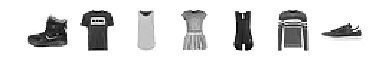

label: [9 0 0 3 0 2 7]


In [5]:
import matplotlib.pyplot as plt

for i in range(7):
    plt.subplot(1,7,i+1)
    dsp_img= train_img[i]
    plt.imshow(dsp_img, cmap='Greys')
    plt.axis('off')

plt.show()
print('label: %s' % (train_lbl[0:7],))

Now let us see how, for example, the 1st image is represented in the dataset. Each pixel is described by one `uint8` number - an amount of light, that is, it carries only intensity information.

In [6]:
train_img[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Since all the entry values are now spread from 0 to 255, for the future we will want to normalize our dataset to [0,1], dividing each entry by 255.

In [7]:
train_img = train_img/255
val_img = val_img/255
train_img[1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00392157,  0.        ,  0.        ,  0.        ,  0.        ,
         0.16078431,  0.7372549 ,  0.40392157,  0.21176471,  0.18823529,
         0.16862745,  0.34117647,  0.65882353,  0.52156863,  0.0627451 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00392157,  0.        ,
         0.        ,  0.        ,  0.19215686,  0.53333333,  0.85882353,
         0.84705882,  0.89411765,  0.9254902 ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.85098039,  0.84313725,  0.99607843,
         0.90588235,  0.62745098,  0.17647059,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.05490196,  0.69019608,  0.87058824,  0.87843137,  0.83137255,
         0.79607843,  0.7764

Let us count, how many items with a certain label there are in the training and test sets. We see that there are 6000 examples of each product type in the training set and 1000 - in the test set. That is, the distribution is homogenious.

In [8]:
print("Distribution of items across labels for training:", np.bincount(train_lbl))
print("Distribution of items across labels for testing:", np.bincount(val_lbl))

Distribution of items across labels for training: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Distribution of items across labels for testing: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
